In [1]:
from warnings import filterwarnings

In [2]:
import pandas as pd
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/drug200.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:

df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [4]:
## Step2: Perform basic data quality checks

In [5]:
df.shape

(200, 6)

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [8]:
# check for missing values
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:

df = df.drop_duplicates()

In [11]:
## Step3: Separate data into X and Y features

#Y:Drug to be predicted

In [12]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [13]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [14]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [15]:
## Step4 : Data Preprocessing and Data cleaning

In [16]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [17]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [18]:

print(cat,con,sep='\n')

['Sex', 'BP', 'Cholesterol']
['Age', 'Na_to_K']


In [19]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [20]:
con_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

In [21]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',con_pipe,con)
]).set_output(transform='pandas')


In [22]:
pre

,transformers,"[('cat', ...), ('con', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [23]:

X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.291591,1.286522
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.415145
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.828558
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.988614,-1.149963
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.011034,0.271794


In [24]:
# Step5: Split the data into training and testing

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.75,random_state=42)

In [27]:
xtrain.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
114,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.473377,-0.944158
173,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.200874,0.368382
5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.352186,-1.037693
126,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.314011,0.036431
117,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.261469,-0.830085


In [28]:

xtest.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
95,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.503851,-0.646762
15,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.715759,-0.078892
30,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.594568,-1.017848
158,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.889843,-0.782762
128,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.162699,2.422679


In [29]:

ytrain.head()

,Drug
114,drugX
173,DrugY
5,drugX
126,DrugY
117,drugX


In [30]:

ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [31]:
# Step6: Build the Decision Tree model

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtc = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=3,
    criterion='gini'
)

In [34]:
dtc.fit(xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,3
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
dtc.score(xtrain,ytrain)

1.0

In [36]:
dtc.score(xtest,ytest)

1.0

## Step6: Bulid the secision Tree Model


In [38]:
from sklearn .tree import DecisionTreeClassifier

In [39]:
dtc = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf =3,
    criterion='gini'

)

In [41]:

dtc.fit(xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,3
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
dtc.score(xtrain,ytrain)


1.0

In [45]:
dtc.score(xtest,ytest)

1.0

## Step7: Hyperparameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
params = {
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_split':[1,2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'criterion':['gini','entropy']
}

In [48]:
base_model = DecisionTreeClassifier()


In [49]:
gscv = GridSearchCV(estimator=base_model,param_grid=params,cv=4,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

d:\ML\repository\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
576 fits failed out of a total of 5184.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML\repository\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML\repository\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "d:\ML\repository\venv\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [1, 2, ...]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [50]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [51]:

gscv.best_score_

np.float64(0.9873015873015873)

In [52]:

gscv.score(xtrain,ytrain)

1.0

In [53]:

gscv.score(xtest,ytest)

1.0

In [54]:

best_dtc = gscv.best_estimator_
best_dtc


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Step8: Evaluation Metrics

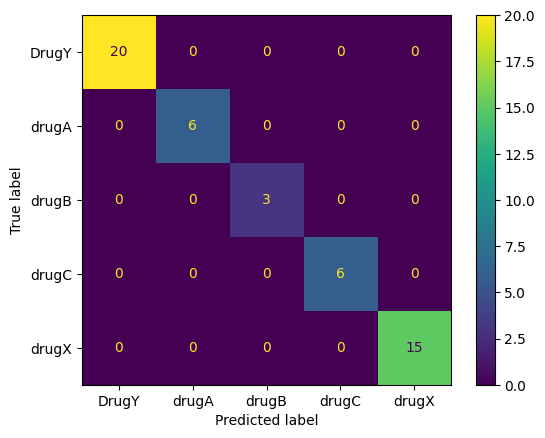

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc,xtest,ytest)

In [56]:

from sklearn.metrics import classification_report
ypred_test = best_dtc.predict(xtest)
ypred_test[:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [57]:

ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [58]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        20
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [59]:
##Step9: Plot the decision tree

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [61]:
xtrain.columns

Index(['cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL',
       'con__Age', 'con__Na_to_K'],
      dtype='object')

In [62]:

fea_names = xtrain.columns
fea_names

Index(['cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL',
       'con__Age', 'con__Na_to_K'],
      dtype='object')

In [63]:
Y['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [64]:
best_dtc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

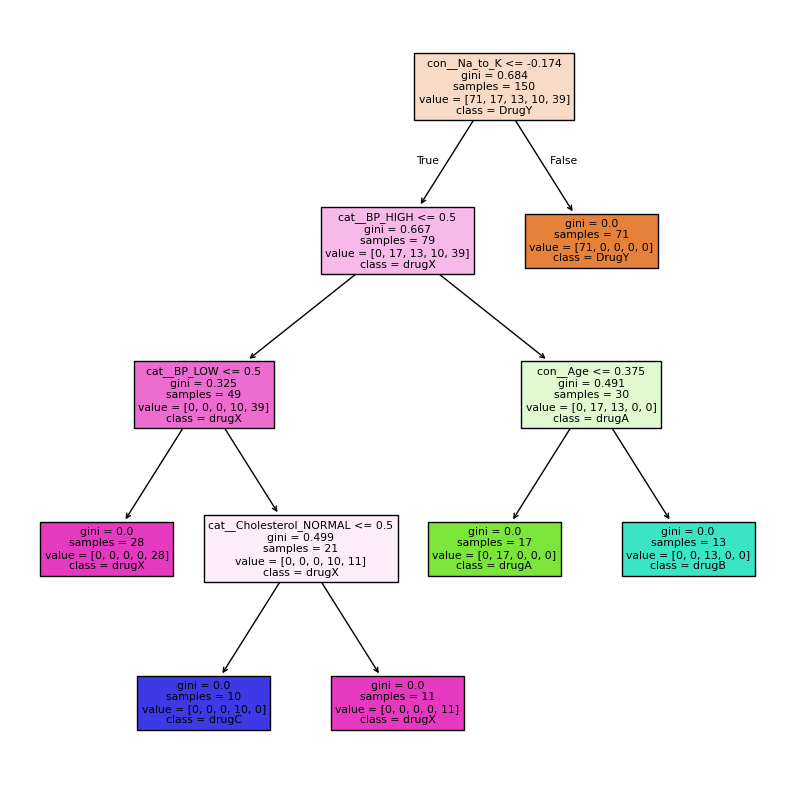

In [65]:

plt.figure(figsize=(10,10))
plot_tree(best_dtc,feature_names=fea_names,class_names=best_dtc.classes_,filled=True)
plt.show()

In [66]:

best_dtc.feature_importances_

array([0.        , 0.        , 0.21487494, 0.05307715, 0.        ,
       0.        , 0.10217351, 0.14369311, 0.4861813 ])

In [67]:

imp_features_bymodel = pd.Series(best_dtc.feature_importances_,index=fea_names)
imp_features_bymodel.sort_values(ascending=False)

con__Na_to_K               0.486181
cat__BP_HIGH               0.214875
con__Age                   0.143693
cat__Cholesterol_NORMAL    0.102174
cat__BP_LOW                0.053077
cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
cat__BP_NORMAL             0.000000
cat__Cholesterol_HIGH      0.000000
dtype: float64

<Axes: >

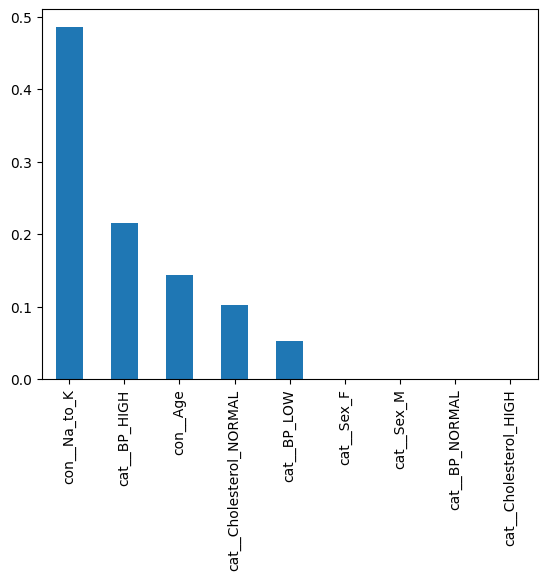

In [68]:

imp_features_bymodel.sort_values(ascending=False).plot(kind='bar')

Above model is providing scores above 0.80, we can cpnsider this model for final model building and use it for out of sample predictions

##Step 10: Out of Sample Predictions

In [69]:

path2 = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/DrugTest.csv'
xnew = pd.read_csv(path2)
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,22.0,F,HIGH,NORMAL,22.818
1,15.0,M,HIGH,NORMAL,17.206
2,67.0,M,NORMAL,NORMAL,9.514
3,68.0,M,NaN,HIGH,11.009
4,70.0,F,NORMAL,HIGH,NaN


In [70]:
pre

,transformers,"[('cat', ...), ('con', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [71]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.352186,0.934448
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.776354,0.155639
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.374607,-0.911824
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.435202,-0.704354
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.556393,0.000000


In [72]:
drug_predicted = best_dtc.predict(xnew_pre)

In [73]:

drug_predicted[:10]

array(['DrugY', 'DrugY', 'drugX', 'drugB', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'DrugY', 'drugX'], dtype=object)

In [74]:
xnew['Drug_Predicted'] = drug_predicted
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Predicted
0,22.0,F,HIGH,NORMAL,22.818,DrugY
1,15.0,M,HIGH,NORMAL,17.206,DrugY
2,67.0,M,NORMAL,NORMAL,9.514,drugX
3,68.0,M,NaN,HIGH,11.009,drugB
4,70.0,F,NORMAL,HIGH,NaN,DrugY


##Step11: Save the results to csv file

In [75]:

xnew.to_csv('Drug Results.csv',index=False)

In [76]:
import pandas as pd
df1 = pd.read_csv("Drug Results.csv")
df1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Predicted
0,22.0,F,HIGH,NORMAL,22.818,DrugY
1,15.0,M,HIGH,NORMAL,17.206,DrugY
2,67.0,M,NORMAL,NORMAL,9.514,drugX
3,68.0,M,NaN,HIGH,11.009,drugB
4,70.0,F,NORMAL,HIGH,NaN,DrugY
5,67.0,F,NORMAL,HIGH,15.891,DrugY
6,NaN,M,NORMAL,HIGH,25.786,DrugY
7,51.0,M,HIGH,NORMAL,11.343,drugB
8,23.0,F,HIGH,HIGH,25.355,DrugY
9,35.0,M,LOW,NORMAL,9.170,drugX
